In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
import pandas as pd

from sklearn.model_selection import cross_val_score

import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.utils import shuffle

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("drive/My Drive/Final Year Research/Dataset/Oneplus 5T/datafiles/rgbarray.csv")
metadata=pd.read_csv('drive/My Drive/Final Year Research/Dataset/Oneplus 5T/datafiles/metadata.csv')
labels = np.load("drive/My Drive/Final Year Research/Dataset/Oneplus 5T/datafiles/labeldata.npy")

# Modify dataframe for selected features

In [4]:
df['brightness']=metadata['brightness']
df['shutter_speed']=metadata['shutter_speed']
df['exposure_time']=metadata['exposure_time']
#df['iso']=metadata['iso']
df

,red_val,green_val,blue_val,brightness,shutter_speed,exposure_time
0,79.521870,109.512877,37.915592,4.85,8.976,0.001984
1,75.679507,105.365517,36.042771,4.92,9.066,0.001866
2,73.817239,103.502585,34.868638,4.93,9.109,0.001808
3,74.141495,102.659802,39.490112,5.03,9.193,0.001709
4,73.841558,102.396006,38.074632,5.04,9.193,0.001709
...,...,...,...,...,...,...
595,83.586370,106.100868,32.502262,5.04,9.024,0.001919
596,83.258601,94.892797,25.081329,5.51,9.574,0.001311
597,89.934311,102.587774,27.332004,5.35,9.323,0.001560
598,56.277831,75.547299,10.651658,5.29,9.367,0.001515


#Model training

In [ ]:
X=df[0:]
Y=labels
X

In [9]:
rs=42
X_train, X_test, y_train, y_test = tts(X, Y, test_size=0.25, random_state=rs)

# Support Vector Machine

In [41]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SVC(gamma='auto',random_state=rs))

scores = cross_val_score(clf, X, Y, cv=100)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

means=[cross_val_score(clf, X, Y, cv=i).mean() for i in range(2,120,10)]


0.95 accuracy with a standard deviation of 0.10


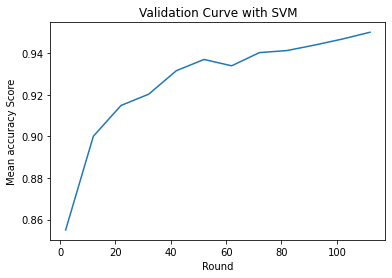

In [42]:
plt.title("Validation Curve with SVM")
plt.xlabel("Round")
plt.ylabel("Mean accuracy Score")
plt.plot(np.arange(2,120,10,dtype=int),means)

### Accuracy reaches 95% for cross validation rounds count exceeding 100